### Resonancia mecánica y su modelamiento numérico
#### Curso de Física Computacional - Universidad Nacional de Trujillo
- Herrera Monteza Jherson Miguel


#### Oscilaciones forzadas y resonancia

### Primero se resolverá las oscilaciones libres

In [72]:
from matplotlib import pyplot as plt   # libreriía para realizar gráficos, similar a matlab
import numpy as np                      # libreria para trabajar con matrices
import scipy as sp                     # Libreria para trabajar con funciones matematicas
from matplotlib import style            # Libreria para estilos de graficos
plt.style.use(['science', 'notebook'])     # Estilo de graficos

La ecuación a resolver es 
$$y^{\prime \prime}_{(t)} + y_{(t)} = 0$$
cuya solución analitica es:
$$y_{(t)} = A\cos(t) + B \sin(t) $$ 
también:
$$y_{(t)}^{\prime} = -A \sin(t) + B \cos(t) $$


In [73]:
# Definimos una fucnción para la solución analítica de la ecuación
def y_t (yo, A, B, y = None):          # y = None es un gotcha (se hace eso para que al llamar a dicha función se genere una nueva lista)
    if y is None:
        y = [yo]                         # se crea una lista con priner valor igual a la condición inicial
    tiempo = np.linspace(0, 60, 1000)    # se crea una lista de tiempos de 0 a 60 segundos
    for t in tiempo:                    # se recorre la lista de tiempos y se calcula el valor de la solución
        y.append(A*np.cos(t) + B*np.sin(t)) # Se agrega el valor a la lista
    
    return tiempo, y  # la función retorna la lista de tiempos y la lista de valores de la solución para posteriormente graficarla

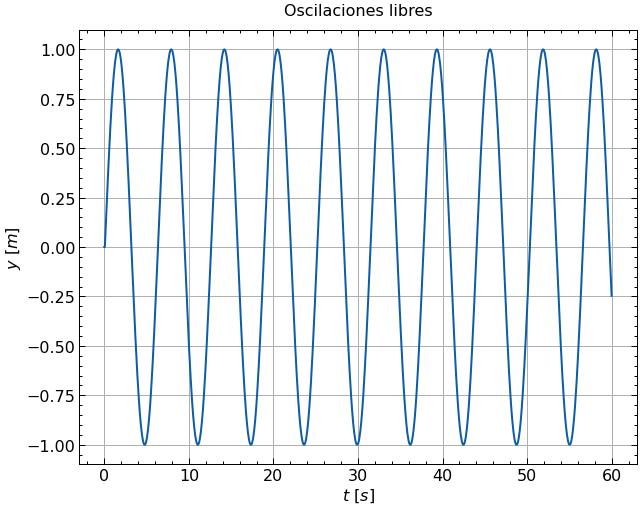

In [74]:
# Creamos una figura para graficar
aex = plt.figure(figsize=(10,8))
# llamamos a la función y_t para obtener los valores de la solución
tt, yy= y_t(0, 0, 1) # y[0] = 0, A = 0, B = 1

# Ggraficamos la solución analítica
plt.plot(tt, yy[:len(tt)])
plt.title('Oscilaciones libres', pad=15)
plt.xlabel(r'$t \ [s]$')
plt.ylabel(r'$y \ [m]$')
plt.grid()

Podemos hallar la velocidad

In [75]:
# Velocidad
def ydt(yo, A, B, yd = None):
    if yd is None:
        yd = [yo]   
    tiempo = np.linspace(0, 60, 1000)
    for t in tiempo:
        yd.append(A*np.sin(t) - B*np.cos(t)) 
    
    return tiempo, yd

In [76]:
tmp, velocidad = ydt(0, 0, 1)

Graficamos veloicidad vs posición, se evidencia que se conserva la energía del sistema

Text(0, 0.5, '$v \\ [m/s]$')

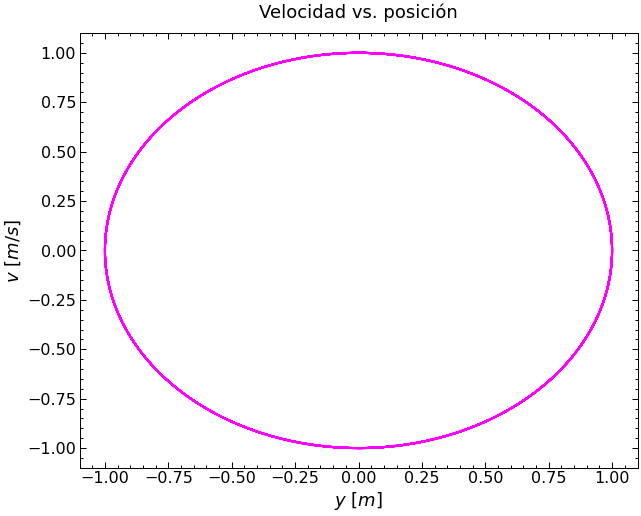

In [77]:
f = plt.figure(figsize=(10,8))
plt.plot(yy[1:], velocidad[1:], color='magenta')
plt.title('Velocidad vs. posición', pad=15, fontsize=18)
plt.xlabel(r'$y \ [m]$', fontsize=18)
plt.ylabel(r'$v \ [m/s]$', fontsize=18)

### Oscilaciones forzadas y amortiguadas

La ecuación a resolver es 
$$y^{\prime \prime}_{(t)} + y_{(t)} = \cos(\omega t)$$



la despejamos

$$y_{(t)}^{\prime \prime} = \cos(\omega t) - y_{(t)}$$

definimos una función

In [78]:
def f_forzado(w,t,y):
    p = np.cos(w*t)-y
    return p # Retorna los valores

In [79]:
def eulerOscilacionForzada(w, yo, vo, y = None, v = None):
    if y is None:
        y = [yo]
    if v is None:
        v = [vo]
    dt = 0.1
    tiempo = np.arange(0, 20+dt, dt)
    for i in range(len(tiempo)):
        y_derivada = f_forzado(w, tiempo[i], y[i])
        y.append(y[i]+v[i]*dt) # Se usa el método de Euler para agregar cada valor a la lista
        v.append(v[i]+y_derivada*dt)
    plt.plot(tiempo, y[:len(tiempo)])
    return y, v

Condiciones iniciales:

In [80]:
yo = 0
vo = 0

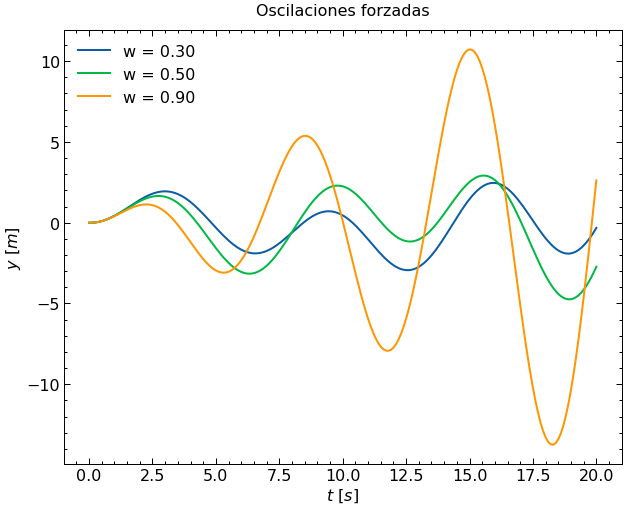

In [81]:
figura = plt.figure(figsize=(10,8))
plt.title('Oscilaciones forzadas', pad=15)
plt.xlabel(r'$t \ [s]$')
plt.ylabel(r'$y \ [m]$')
for w in [0.3, 0.5, 0.90]:
    eulerOscilacionForzada(w, yo, vo, y = None, v = None)
    plt.legend(['w = 0.30', 'w = 0.50', 'w = 0.90'])


La solución analitica es:
$$y_{(t)} = A\cos(t) + B \sin(t) + \dfrac{\cos(\omega t)}{1-\omega^2} $$
$$y_{(t)}^{\prime} = -A\sin(t) + B \cos(t) + - \omega \dfrac{\sin(\omega t)}{1-\omega^2} $$

In [82]:
def solucion_analitica_forzado(A, B, w,t, y = None):
    if y is None:
        y = []
    tiempo = np.linspace(0, t, 400)
    for t in tiempo:
        yt = A*np.cos(t) + B*np.sin(t)+np.cos(w*t)/(1-w**2)
        y.append(yt)
    plt.plot(tiempo, y[:len(tiempo)])
    return tiempo, y

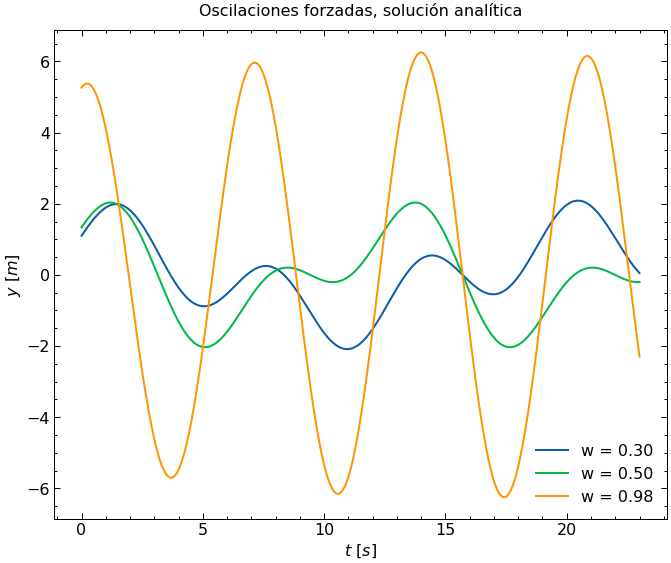

In [83]:
figurar = plt.figure(figsize=(11,9))
plt.title('Oscilaciones forzadas, solución analítica', pad=15)
plt.xlabel(r'$t \ [s]$')
plt.ylabel(r'$y \ [m]$')
for w in [ 0.30, 0.50, 0.9]:
    tiempo, y = solucion_analitica_forzado(0, 1, w, 23)
    plt.legend(['w = 0.30', 'w = 0.50', 'w = 0.98'])
    

Si graficamos para un dominio de tiempo más amplio notamos que la frecuencia de la fuerza externa actúa equilibrando el sistema físico :

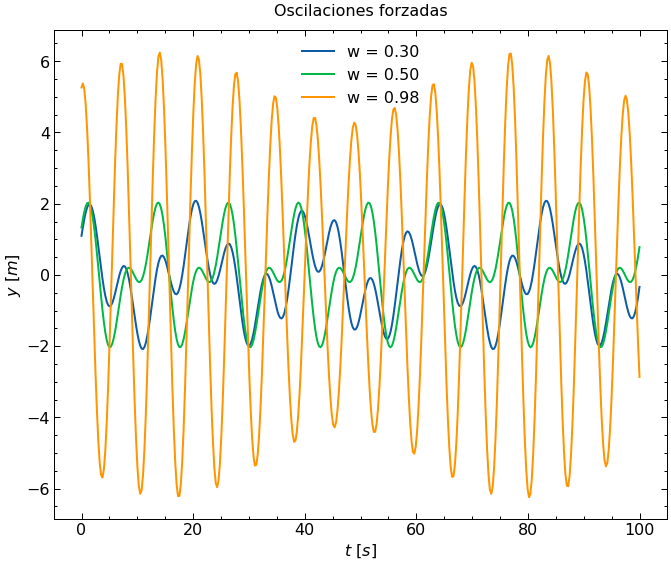

In [84]:
figura2 = plt.figure(figsize=(11,9))
plt.title('Oscilaciones forzadas', pad=15)
plt.xlabel(r'$t \ [s]$')
plt.ylabel(r'$y \ [m]$')
for w in [ 0.30, 0.50, 0.9]:
    tiempo, y = solucion_analitica_forzado(0, 1, w, 100)
    plt.legend(['w = 0.30', 'w = 0.50', 'w = 0.98'])